# Milestone 2: GranAda

## 1. Imports

We start by importing all the packages needed

In [10]:
import pandas as pd
import numpy as np
import helper as hp
import seaborn as sns

import matplotlib.pyplot as plt

## 2. Datasets
Download the "All Data" folders for each category in "Bulk Downloads", then place folders in a "__data/__" folder for this notebook.

* df_prod: http://www.fao.org/faostat/en/#data/QC
* df_value: http://www.fao.org/faostat/en/#data/QV
* df_trade: http://www.fao.org/faostat/en/#data/TM
* df_pop: https://population.un.org/wpp/

Note: Population data was extracted from "Estimates" for [1993:2016], tags were manually modified to fit FAO style. Modified CSV file must be given.

## 3. Cleaning the Datasets

We start by identifying common products in our datasets. Many of the definitions of the datasets herunder are taken from the FAO's website, with some trimming and modifications from us.

### 3.1 Loading the data

We start by loading the data into pandas dataframes

In [2]:
df_prod = pd.read_csv("data/Production_Crops_E_All_Data/Production_Crops_E_All_Data.csv",
                      encoding="unicode_escape")
df_value = pd.read_csv("data/Value_of_Production_E_All_Data/Value_of_Production_E_All_Data.csv",
                       encoding="unicode_escape")
df_trade = pd.read_csv('data/Trade_DetailedTradeMatrix_E_All_Data/Trade_DetailedTradeMatrix_E_All_Data.csv',
                       encoding="unicode_escape")

df_pop = pd.read_csv("data/Population_table_trimmed.csv",
                     encoding="unicode_escape")
df_pop = df_pop.sort_values(by=['Area'])
df_pop.reset_index(drop=True,inplace=True)

/Users/Niels/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 3.2 Dataset Descriptions

#### Production Dataset

The production dataset contains 180 products (the item row in the dataset) and 258 areas (countries and regions), with the following possible values

* Production Quantity and Seed \[tonnes\] 
* Area harvested \[hectares\]
* Yield \[tonnes per hectare\]

In [3]:
print(f'Number of products: {len(df_prod["Item"].value_counts())}')
print(f'Number of areas: {len(df_prod["Area"].value_counts())}')
df_prod.head()

Number of products: 180
Number of areas: 258


,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,14114.0,NaN,13703.0,NaN,14676.0,NaN,19481.0,NaN,19793.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,29910.0,Fc,19996.0,Fc,16521.0,Fc,16859.0,Fc,13788.0,Fc
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,42215.0,NaN,27400.0,NaN,24246.0,NaN,32843.0,NaN,27291.0,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,M,NaN,...,18500.0,F,30000.0,F,25000.0,F,26019.0,Im,28873.0,Im
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,6757.0,Fc,7167.0,Fc,7200.0,Fc,6923.0,Fc,6830.0,Fc


#### Value Dataset

There are 222 products and 261 areas in this dataset. Value of gross production is provided in both current and constant terms and is expressed in US dollars and Standard Local Currency (SLC). The current value of production measures value in the prices relating to the period being measured. Thus, it represents the market value of food and agricultural products at the time they were produced.

Expressing data series in one uniform currency is useful because it avoids the influence of revaluation in local currency, if any, on value of production. The following elements are present in the dataset.

* Gross Production Value (constant 2004-2006 1000 International USD)
* Gross Production Value (constant 2004-2006 million Standard Local Currency)
* Gross Production Value (constant 2004-2006 million USD)
* Gross Production Value (current million Standard Local Currency)
* Gross Production Value (current million USD)
* Net Production Value (constant 2004-2006 1000 International USD)

In [4]:
print(f'Number of products: {len(df_value["Item"].value_counts())}')
print(f'Number of areas: {len(df_value["Area"].value_counts())}')
df_value.head()

Number of products: 222
Number of areas: 261


,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2012,Y2012F,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F
0,2,Afghanistan,221,"Almonds, with shell",152,Gross Production Value (constant 2004-2006 100...,1000 Int. $,NaN,NaN,NaN,...,182960.078000,Fc,124575.156335,Fc,80856.550600,Fc,71549.194374,Fc,96918.674867,Fc
1,2,Afghanistan,221,"Almonds, with shell",154,Net Production Value (constant 2004-2006 1000 I$),1000 Int. $,NaN,NaN,NaN,...,182960.078000,Fc,124575.156335,Fc,80856.550600,Fc,71549.194374,Fc,96918.674867,Fc
2,2,Afghanistan,221,"Almonds, with shell",56,Gross Production Value (current million SLC),SLC,NaN,NaN,NaN,...,14911.000000,Fc,9230.459191,Fc,5563.109132,Fc,4824.773367,Fc,6050.024466,Fc
3,2,Afghanistan,221,"Almonds, with shell",55,Gross Production Value (constant 2004-2006 mil...,SLC,NaN,NaN,NaN,...,6460.468889,Fc,4398.849906,Fc,2855.110444,Fc,2526.460140,Fc,3422.277092,Fc
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",152,Gross Production Value (constant 2004-2006 100...,1000 Int. $,NaN,NaN,NaN,...,69090.200000,Fc,69090.200000,Fc,73114.852434,Fc,79457.968291,Fc,77478.699955,Fc


#### Trade Dataset

Export values are reported as FOB (free on board — that is, the value of the goods plus the value of the services performed to deliver the goods to the border of the exporting country).

Value of agricultural imports: Value of agricultural imports are expressed in thousand US dollars in the FAOSTAT database. Import values are reported as CIF (cost insurance and freight — that is, the value of the goods, plus the value of the services performed to deliver goods to the border of the exporting country, plus the value of the services performed to deliver the good from the border of the exporting country to the border of the importing country).

Quantity of food and agricultural imports: Import quantity represents the physical quantity of the products imported for domestic consumption or processing shipped into a country. It includes re-imports.

In [5]:
print(f'Number of products: {len(df_trade["Item"].value_counts())}')
print(f'Number of areas partner: {len(df_trade["Partner Countries"].value_counts())}')
print(f'Number of areas reporting: {len(df_trade["Reporter Countries"].value_counts())}')
df_trade.head()

Number of products: 424
Number of areas partner: 255
Number of areas reporting: 184


,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Unit,Y1986,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
0,2,Afghanistan,4,Algeria,230,"Cashew nuts, shelled",5910,Export Quantity,tonnes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,*,NaN,NaN
1,2,Afghanistan,4,Algeria,230,"Cashew nuts, shelled",5922,Export Value,1000 US$,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,*,NaN,NaN
2,2,Afghanistan,4,Algeria,1293,Crude materials,5922,Export Value,1000 US$,NaN,...,NaN,NaN,NaN,NaN,1.0,*,1.0,*,5.0,R
3,2,Afghanistan,4,Algeria,561,Raisins,5910,Export Quantity,tonnes,NaN,...,NaN,NaN,12.0,*,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Afghanistan,4,Algeria,561,Raisins,5922,Export Value,1000 US$,NaN,...,NaN,NaN,27.0,*,NaN,NaN,NaN,NaN,NaN,NaN


### 3.3 Adjusting Units of Interest

We start by removing rows that aren't in the 1000 USD currency unit from the trade matrix. We only want to keep production values for (area, item) pairs where we have data on the Gross and Net Production value. Two methods to manipulate data were tested. Ultimately using "sets" and redefining the dataframe was much faster.

We separate the value datasets into datasets containing only the net or gross production value.

In [6]:
US_gross = df_value.Element == "Gross Production Value (constant 2004-2006 1000 I$)"
US_net = df_value.Element == "Net Production Value (constant 2004-2006 1000 I$)"

df_value_g = df_value[US_gross]
df_value_n = df_value[US_net]
df_value = df_value[US_net|US_gross]

print(f'Gross Production Value rows: {len(df_value_g.Element)}')
print(f'Net Production Value rows  : {len(df_value_n.Element)}')
print(f'Total Production Value rows: {len(df_value.Element)}')

Gross Production Value rows: 20346
Net Production Value rows  : 20260
Total Production Value rows: 40606


In [7]:
# Obtain all (area, item) pairs for which we have Gross Production Value
AI_value_ind_g = df_value_g['Area'].astype(str) + df_value_g['Item']
AI_value_g = set(AI_value_ind_g.unique())

# Obtain all (area, item) pairs for which we have Net Production Value
AI_value_ind_n = df_value_n['Area'].astype(str) + df_value_n['Item']
AI_value_n = set(AI_value_ind_n.unique())

AI_g = AI_value_g - AI_value_n
AI_n = AI_value_n - AI_value_g

df_value = df_value.drop(AI_value_ind_g[[AI in AI_g for AI in AI_value_ind_g]].index)
df_value.Element.value_counts()

Net Production Value (constant 2004-2006 1000 I$)      20260
Gross Production Value (constant 2004-2006 1000 I$)    20260
Name: Element, dtype: int64

### 3.4 Adjusting Years of Interest

A lot of data is missing for the years before 1993, and the value dataset only contains data up to 2016. Hence we limit or data to the years 1993-2016.

Additionaly, in the values for both "not reported" and "zero" are NaN. The flags in each dataset help specify if the NaN value represents zero or is actually missing.

The reduce the size of the dataframes, a function was written to remove unused columns (such as unused years, and non human readable tags). This function also replaces NaN values by zero when the value is meant to be zero.

In [8]:
def remove_years(df, year_min=[1961,1993], year_max=[2017,2020]):   
    """
    Cleans data matrix by FAO-code columns, and FAO-flag columns. 
    Additionaly removes undesired years from matrices.
    
    :param df: pd.DataFrame The dataframe containing the import, export, production, or value data.
    :param year_min: range of minimum years to be removed [1981,1993], 1993 excluded.
    :param year_min: range of maximum years to be removed [2017,2020], 2020 excluded.
    :return: pd.DataFrame containing trimmed down data.
    """
    #Flags NaN mean "official data". Flag M means missing value. Therefore, [NaN,NaN] in [Y#,Y#F] means zero.
    #Note: for "production value" dataset, Flags NaN is not explicitely reported as the "official data"
    for year in range(year_min[1],year_max[0]):
        yi="Y"+str(year)
        yf="Y"+str(year)+"F"
        df.loc[df[yi].isna() & df[yf].isna(), [yi]] = 0.0
    
    #Keep human readable columns not containign "Code" and "Y&F"
    df = df.drop(columns=[label for label in df.columns if 'Y' and 'F' in label])
    df = df.drop(columns=[label for label in df.columns if 'Code' in label])
    
    #Remove undesired years
    yr_list_min = ["Y"+str(year) for year in range(year_min[0],year_min[1])]
    yr_list_max = ["Y"+str(year) for year in range(year_max[0],year_max[1])]
    df = df.drop(columns=[year for year in df.columns if year in yr_list_min])
    df = df.drop(columns=[year for year in df.columns if year in yr_list_max])
    return df

df_prod = remove_years(df_prod)
df_value = remove_years(df_value)
df_trade = remove_years(df_trade)

### 3.5 Adjusting Countries

More countries are present in the country list than number of countries in the world. We noticed that some countries that no longer exist appeared (i.e. "USSR"). These were left in, in case data gaps needed to be explained. To remove specific countries, they can later be removed from the overlap set.

We start by checking, if some countries are partners but never reporters in the trade matrix.

In [9]:
reporter_set = set(df_trade["Reporter Countries"].unique())
partner_set = set(df_trade["Partner Countries"].unique())

print(f" Only in reporter countries:\n {reporter_set.difference(partner_set)} \n")
print(f" Only in partner countries:\n {partner_set.difference(reporter_set)} \n")

 Only in reporter countries:
 set() 

 Only in partner countries:
 {'Neutral Zone', 'San Marino', 'Czechoslovakia', 'Norfolk Island', 'Pacific Islands Trust Territory', 'Gibraltar', 'Micronesia (Federated States of)', 'Andorra', 'Turkmenistan', 'United States Virgin Islands', 'Wake Island', 'Somalia', 'Guam', 'Iraq', 'Canton and Enderbury Islands', 'Samoa', 'American Samoa', 'British Indian Ocean Territory', 'Anguilla', 'Holy See', 'Guinea-Bissau', 'Liberia', 'South Georgia and the South Sandwich Islands', 'Saint Helena, Ascension and Tristan da Cunha', 'South Sudan', 'Falkland Islands (Malvinas)', 'Saint Pierre and Miquelon', 'Christmas Island', 'Antarctica', 'Dominican Republic', 'Midway Island', "Democratic People's Republic of Korea", 'Heard and McDonald Islands', 'Angola', 'Myanmar', 'Tajikistan', 'Mayotte', 'Marshall Islands', 'Tokelau', 'Bouvet Island', 'Eritrea', 'Uzbekistan', 'Nauru', 'Cocos (Keeling) Islands', 'Timor-Leste', 'Pitcairn Islands', 'Liechtenstein', 'Niue', 'Monac

We can note that many of these "countries" are either small territories where their reporter country would generally the country they are attached to (British Indian Ocean Territory -> United Kingdom), aren't actual countries (Antarctica) or are at war (South Sudan). 

We check how well the different countries line up between the different datasets.

In [10]:
country_p = set(df_prod.Area.unique())
country_v = set(df_value.Area.unique())
country_t = set(df_trade["Partner Countries"].unique())

country_pv = country_p.intersection(country_v)
country_pt = country_p.intersection(country_t)

country_all = country_pv.intersection(country_pt)

print(f"Prod. country list length:      {len(country_p)}")
print(f"Value country list length:      {len(country_v)}")
print(f"PV Joined country list length:  {len(country_pv)}")
print(f"Trade country list length:      {len(country_t)}")
print(f"PT Joined country list length:  {len(country_pt)}\n")
print(f"All Joined country list length: {len(country_all)}")

Prod. country list length:      258
Value country list length:      261
PV Joined country list length:  258
Trade country list length:      255
PT Joined country list length:  221

All Joined country list length: 221


We end up with 221 that are in all datasets. We only keep the countries for which we also have population data.

In [11]:
A_pop_ind = df_pop['Area']
A_pop = set(A_pop_ind.unique())

print("In population matrix only:\n", A_pop - country_all)
print("\nIn production matrix only:\n", country_all - A_pop)

country_all = country_all.intersection(A_pop)

# Verifying no undesired "Territories" remain in list
country_not = set(["World","Asia","Net Food Importing Developing Countries","Americas",\
                 "Low Income Food Deficit Countries","Africa","Land Locked Developing Countries",\
                 "South America","Eastern Asia","Least Developed Countries","Europe","European Union",\
                 "Central America","Southern Europe","Oceania","China","Western Asia","Southern Asia",\
                 "Eastern Africa","Northern Africa","Eastern Europe","South-Eastern Asia","Northern America",\
                 "Small Island Developing States","Western Europe","Central Asia","Western Africa","Middle Africa",\
                 "Caribbean","Southern Africa"])

print(f"\nNone-countries in country list:\n {country_all.intersection(country_not)} \n")

In population matrix only:
 {'Curaçao', 'San Marino', 'Gibraltar', 'Andorra', 'Aruba', 'Anguilla', 'Holy See', 'Sint Maarten (Dutch part)', 'Falkland Islands (Malvinas)', 'State of Palestine', 'Saint Barthélemy', 'Mayotte', 'Western Africa', 'Greenland', 'Bonaire, Sint Eustatius and Saba', 'Saint Martin (French part)', 'North Macedonia', 'Monaco', 'Channel Islands', 'Turks and Caicos Islands', 'Isle of Man', 'Palau', 'Northern Mariana Islands'}

In production matrix only:
 {'Ethiopia PDR', 'Czechoslovakia', 'Serbia and Montenegro', 'USSR', 'Pacific Islands Trust Territory', 'Yugoslav SFR', 'Belgium-Luxembourg', 'Sudan (former)'}

None-countries in country list:
 set() 



We then remove countries that aren't found in all sets.

In [12]:
df_prod = df_prod[[country in country_all for country in df_prod["Area"]]]
df_value = df_value[[country in country_all for country in df_value["Area"]]]
df_trade = df_trade[[country in country_all for country in df_trade["Partner Countries"]]]
df_trade = df_trade[[country in country_all for country in df_trade["Reporter Countries"]]]
df_pop = df_pop[[country in country_all for country in df_pop["Area"]]]

We then verify if any additonal differences between datasets realting to area tags must be resolved.

In [13]:
print(f'Items produced per country:\n{df_prod["Area"].value_counts()}\n\n')
print(f'Items values per country:\n{df_value["Area"].value_counts()}\n\n')

Items produced per country:
China, mainland                                 395
Mexico                                          374
Spain                                           349
Peru                                            331
Turkey                                          322
                                               ... 
Faroe Islands                                     6
United States Virgin Islands                      5
China, Macao SAR                                  3
Saint Helena, Ascension and Tristan da Cunha      2
Liechtenstein                                     2
Name: Area, Length: 213, dtype: int64


Items values per country:
China, mainland                                 310
Mexico                                          280
Spain                                           272
Turkey                                          264
Morocco                                         252
                                               ... 
Western Sahara        

The production matrix and value matrix do not have data that correspond to eachother. As such, data without its "production:value" pair is removed.

In [14]:
AI_prod_ind = df_prod['Area'].astype(str) + df_prod['Item']
AI_prod = set(AI_prod_ind.unique())

AI_value_ind = df_value['Area'].astype(str) + df_value['Item']
AI_value = set(AI_value_ind.unique())

AI_all = AI_prod.intersection(AI_value)

print(f"Prod Area/Item pair length:  {len(AI_prod)}")
print(f"Value Area/Item pair length: {len(AI_value)}")
print(f"Area/Item intersect length:  {len(AI_all)}")

df_prod = df_prod[[AI in AI_all for AI in AI_prod_ind]]
df_value = df_value[[AI in AI_all for AI in AI_value_ind]]

Prod Area/Item pair length:  11979
Value Area/Item pair length: 14393
Area/Item intersect length:  10101


In [15]:
print(f'Number of trades as a reporter:\n{df_trade["Reporter Countries"].value_counts()}\n\n')
print(f'Number of trades as a partner:\n{df_trade["Partner Countries"].value_counts()}\n\n')
print(f'Difference\n: {df_trade["Reporter Countries"].value_counts() - df_trade["Partner Countries"].value_counts()}')

Number of trades as a reporter:
Netherlands                 122185
France                      114931
Germany                     110131
United States of America    109423
United Kingdom              102120
                             ...  
Sao Tome and Principe         3208
French Guiana                 3112
Bhutan                        2160
Cook Islands                  1976
Tuvalu                        1556
Name: Reporter Countries, Length: 174, dtype: int64


Number of trades as a partner:
United States of America        122076
France                          113378
Germany                         106747
Netherlands                     104205
United Kingdom                  103736
                                 ...  
South Sudan                       1239
United States Virgin Islands      1163
Liechtenstein                      820
Tokelau                            633
Western Sahara                     177
Name: Partner Countries, Length: 213, dtype: int64


Difference
: Afg

For the trade data, we can note quite a bit of discrepency in the data. Sadly, there isn't much to do about it. As described on the FAO  website, these trades can arise from quite a few scenarios. From ships that sinks midway through a journey, and an export is reported but not an import, to three country trades where different countries report different importing and exporting values.





### 3.6 Adjusting Items

We now want to keep only items present in all datasets.

In [16]:
item_p = set(df_prod.Item.unique())
item_v = set(df_value.Item.unique())
item_t = set(df_trade.Item.unique())
item_pt = item_p.intersection(item_t)
item_all = item_pt.intersection(item_v)

print(f" Production item list length: {len(item_p)}")
print(f" Value item list length:      {len(item_v)}")
print(f" Trade item list length:      {len(item_t)}")
print(f" PT Joined list length:       {len(item_pt)}")
print(f" All item list length:        {len(item_all)}")

#Selecting values that only contain overlap items.
df_prod = df_prod[[item in item_all for item in df_prod["Item"]]]
df_value = df_value[[item in item_all for item in df_value["Item"]]]
df_trade = df_trade[[item in item_all for item in df_trade["Item"]]]

 Production item list length: 161
 Value item list length:      161
 Trade item list length:      423
 PT Joined list length:       120
 All item list length:        120


In [17]:
#trimmed down production
df_prod.to_pickle("data/df_prod.pkl")
#trimmed down production value
df_value.to_pickle("data/df_value.pkl")
#trimmed down trade matrix ("Reporter","Partner","Item")
df_trade.to_pickle("data/df_trade.pkl")

## 4. Exploring Global Trade Trends

### 4.1 Setup

We start by importing the trade data from the pickle file, and define a plotting function that will help us explore global trade.

In [18]:
df_trade = pd.read_pickle('data/df_trade.pkl')
df_prod = pd.read_pickle('data/df_prod.pkl')

def plot_trade(s1, s2, label):
    plt.figure(figsize=(15,5))
    plt.xlabel('Year')

    ax1 = s1.plot(label=label+' Weights')
    ax2 = s2.plot(label=label+' Values', secondary_y=True)

    ax1.set_ylabel('tonnes')
    ax2.set_ylabel('1000 US$')

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()

    plt.legend(h1+h2, l1+l2, loc=2)
    plt.show()

### 5.2 Global Trade Volume

We start by looking at the difference in trade volume by looking at the change in imports and exports by weight (in tonnes) and by value (in 1000 US$, adjusted to 2014-2016 value)

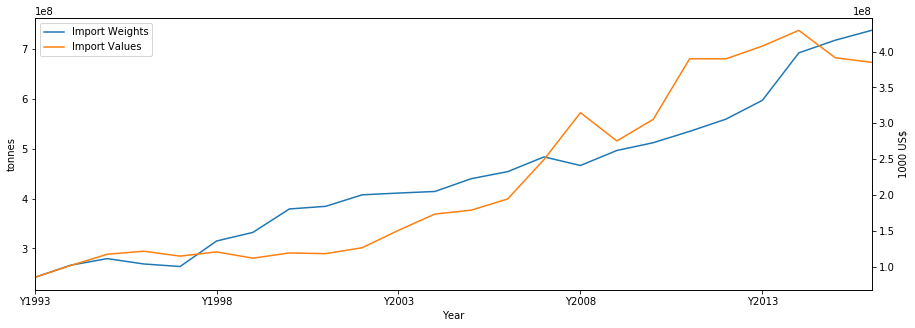

In [19]:
import_w = df_trade[(df_trade['Element'] == 'Import Quantity')]\
    [[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)
import_v = df_trade[(df_trade['Element'] == 'Import Value')]\
    [[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)

plot_trade(import_w, import_v, 'Import')

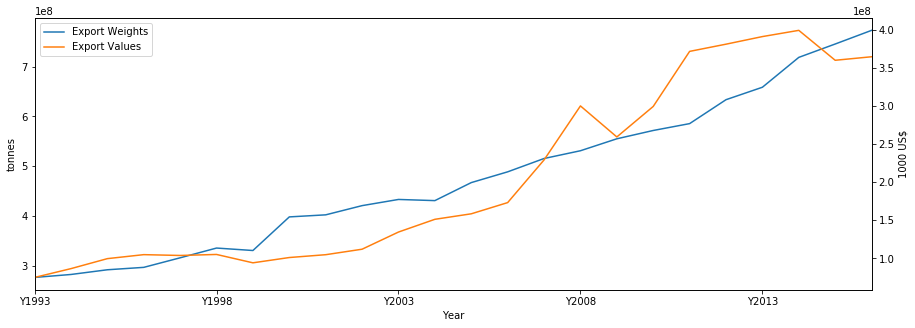

In [20]:
export_w = df_trade[(df_trade['Element'] == 'Export Quantity')]\
    [[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)
export_v = df_trade[(df_trade['Element'] == 'Export Value')]\
    [[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)

plot_trade(export_w, export_v, 'Export')

We can see some slight disparities between imports and exports. This arises from multiple issues. Let's see the difference.

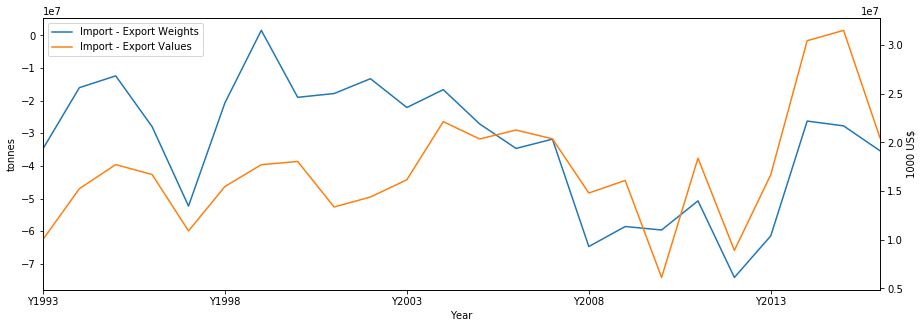

In [21]:
diff_w = import_w - export_w
diff_v = import_v - export_v

plot_trade(diff_w, diff_v, 'Import - Export')

We can see that every year, the amount of produce exported is greater than the amount of produce imported, but the value of imported produce is greater than the value of exported produce.

Many factors contribute to these disparities. The first, most obvious one is that trade isn't perfectly noted by all countries. Here are a few other reasons why these disparities exist:

* An export reported towards the end of a year might reach its destination in January and only be counted as an import the following year.
* Different countries report trade in different ways (e.g. some only count their own exports, while others count re-exports as exports).
* There can be missclassifications of different products between reporting countries.
* Exports can be lost during shipping (ships sinking, produce rotting, ...), and thus never be reported as imports.
* One of the trade partners might have keep data confidentiality and not report trades.
* There could be place of origin/final destination inconsistencies for 3 or more country trades. Example:
    * Switzerland imports Bananas from Colombia, but through the Netherlands.
    * Colombia reports exporting Bananas to Switzerland.
    * Switzerland reports importing Bananas from the Netherlands.
* Importers might try to evade customs tax, and misrepresent the amount or product imported, or simply not report it at all.
* Exports might not be declared to evade embargos.

Sadly, there isn't much we can do to correct these records.

### 4.3 Intercontinental Trade

Now we want to see how continents trade with each other. We define for this the following continents

* Africa
* Americas
* Asia
* Europe
* Oceania

We used the FAO's data to seperate the countries in the matrix into continents.

http://www.fao.org/faostat/en/#definitions

We define inter-continental trades as any trade where the exporting country is in continent A and the importing country is in continent B, where A $\neq$ B. 

We define continental (or intra-continental) trade as any as any trade where the exporting country and the importing country are located in the same continent.

In [22]:
country_groups = pd.read_csv('data/FAOSTAT_data_11-19-2019.csv')
country_groups.head()

,Country Group Code,Country Group,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code
0,5100,Africa,4,Algeria,12.0,DZ,DZA
1,5100,Africa,7,Angola,24.0,AO,AGO
2,5100,Africa,53,Benin,204.0,BJ,BEN
3,5100,Africa,20,Botswana,72.0,BW,BWA
4,5100,Africa,24,British Indian Ocean Territory,86.0,IO,IOT


In [23]:
african_countries = set(country_groups[country_groups['Country Group'] == 'Africa']['Country'])
american_countries = set(country_groups[country_groups['Country Group'] == 'Americas']['Country'])
asian_countries = set(country_groups[country_groups['Country Group'] == 'Asia']['Country'])
european_countries = set(country_groups[country_groups['Country Group'] == 'Europe']['Country'])
oceanian_countries = set(country_groups[country_groups['Country Group'] == 'Oceania']['Country'])

continents = [african_countries, american_countries, asian_countries, european_countries, oceanian_countries]
continent_names = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

We start by looking at how inter and intra continental has evolved between 1993 and 2016.

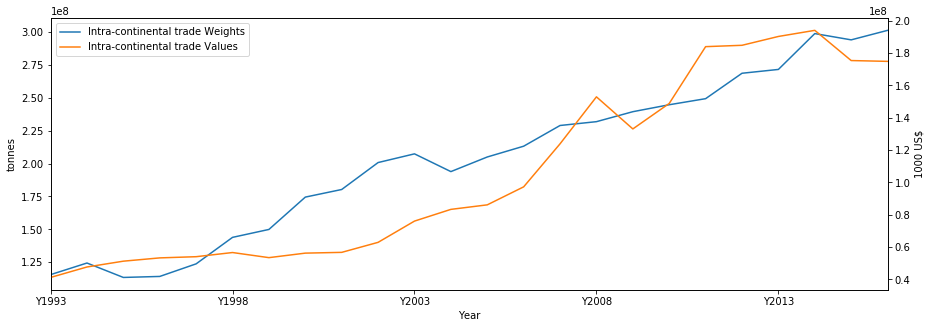

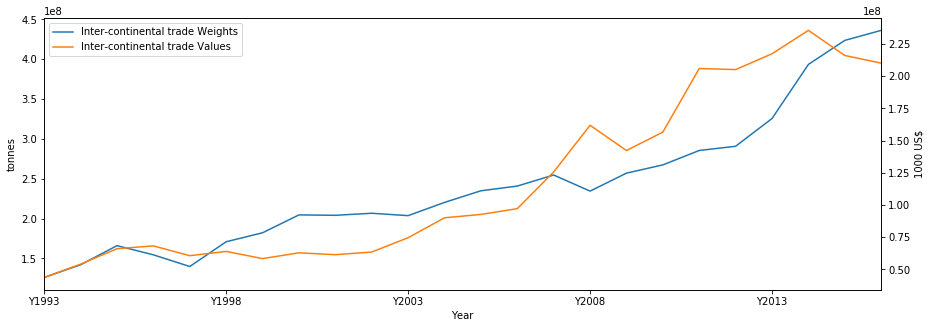

In [24]:
df_intra_continental_imports_w = pd.DataFrame(columns=df_trade.columns)
df_intra_continental_imports_v = pd.DataFrame(columns=df_trade.columns)

df_inter_continental_imports_w = pd.DataFrame(columns=df_trade.columns)
df_inter_continental_imports_v = pd.DataFrame(columns=df_trade.columns)

for c in continents:
    df_intra_continental_imports_w = df_intra_continental_imports_w\
        .append(df_trade[(df_trade['Reporter Countries'].isin(c)) &
                         (df_trade['Partner Countries'].isin(c)) &
                         (df_trade['Element'] == 'Import Quantity')])
    df_intra_continental_imports_v = df_intra_continental_imports_v\
        .append(df_trade[(df_trade['Reporter Countries'].isin(c)) &
                         (df_trade['Partner Countries'].isin(c)) &
                         (df_trade['Element'] == 'Import Value')])

for c1 in continents:
    for c2 in continents:
        if c1 != c2:
            df_inter_continental_imports_w = df_inter_continental_imports_w\
                .append(df_trade[(df_trade['Reporter Countries'].isin(c1)) &
                                 (df_trade['Partner Countries'].isin(c2)) &
                                 (df_trade['Element'] == 'Import Quantity')])
            df_inter_continental_imports_v = df_inter_continental_imports_v\
                .append(df_trade[(df_trade['Reporter Countries'].isin(c1)) &
                                 (df_trade['Partner Countries'].isin(c2)) &
                                 (df_trade['Element'] == 'Import Value')])

df_intra_continental_imports_w_sums = df_intra_continental_imports_w[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)
df_intra_continental_imports_v_sums = df_intra_continental_imports_v[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)

df_inter_continental_imports_w_sums = df_inter_continental_imports_w[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)
df_inter_continental_imports_v_sums = df_inter_continental_imports_v[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)

plot_trade(df_intra_continental_imports_w_sums, df_intra_continental_imports_v_sums, 'Intra-continental trade')
plot_trade(df_inter_continental_imports_w_sums, df_inter_continental_imports_v_sums, 'Inter-continental trade')

At first glance, their increase looks more or less similar. But these plots are on different scales. We hence look at what proportion of imports were from other continents, compared to the same continent.

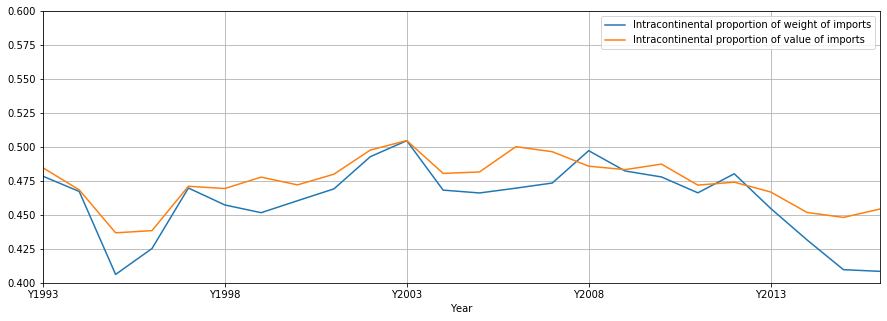

In [25]:
df_total_imports_w_sums = df_intra_continental_imports_w_sums + df_inter_continental_imports_w_sums
df_total_imports_v_sums = df_intra_continental_imports_v_sums + df_inter_continental_imports_v_sums

df_intra_continental_perc_w = df_intra_continental_imports_w_sums/df_total_imports_w_sums
df_intra_continental_perc_v = df_intra_continental_imports_v_sums/df_total_imports_v_sums

plt.figure(figsize=(15,5))
plt.xlabel('Year')
df_intra_continental_perc_w.plot(label='Intracontinental proportion of weight of imports')
df_intra_continental_perc_v.plot(label='Intracontinental proportion of value of imports')
plt.ylim([0.4, 0.6])
plt.grid()
plt.legend()
plt.show()

We notice that despite some fluctuations, and a more stable increase between 2003 and 2016, the proportion of intra and inter continental trade stays quite stable.

TODO: We need to use statistics to determine if there is any significant change in values between 1993 and 2016. 

We now want to look more precisely at regions.

### 4.4 Inter-Regional Trade
Instead of considering continents, we consider the regions, as defined in the FAO's data:

* Africa
    * Eastern Africa
    * Middle Africa
    * Northern Africa
    * Southern Africa
    * Western Africa
* Americas
    * Northern America
    * Central America
    * Caribbean
    * South America
* Asia
    * Central Asia
    * Eastern Asia
    * Southern Asia
    * South-Eastern Asia
    * Western Asia
* Europe
    * Eastern Europe
    * Northern Europe
    * Southern Europe
    * Western Europe
* Oceania
    * Australia and New Zealand
    * Melanesia
    * Polynesia
    
We define inter-regional trades as any trade where the exporting country is in region A and the importing country is in region B, where A $\neq$ B. 

We define regional (or intra-regional) trade as any as any trade where the exporting country and the importing country are located in the same region.

In [26]:
region_names = ['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa',
                'Northern America', 'Central America', 'Caribbean', 'South America',
                'Central Asia', 'Eastern Asia', 'Southern Asia', 'South-Eastern Asia', 'Western Asia',
                'Eastern Europe', 'Northern Europe', 'Southern Europe', 'Western Europe',
                'Australia and New Zealand', 'Melanesia', 'Polynesia']
regions = [set(country_groups[country_groups['Country Group'] == region]['Country']) for region in region_names]

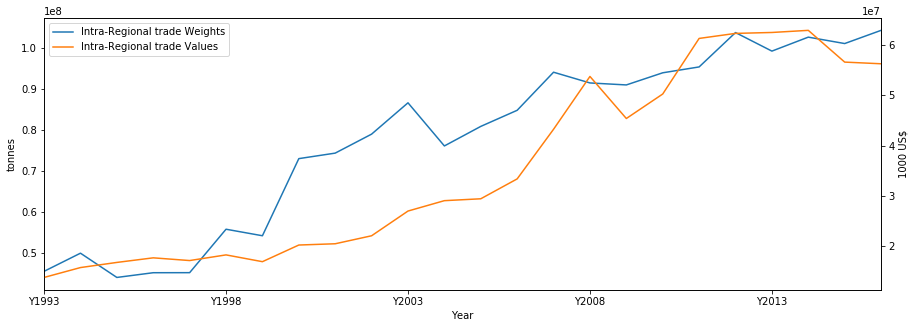

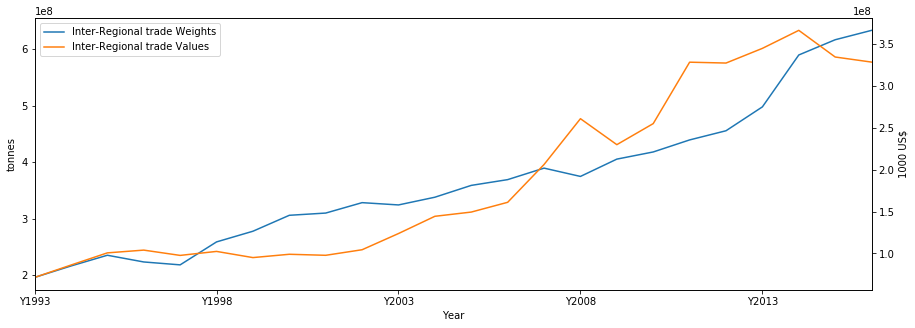

In [27]:
df_intra_regional_imports_w = pd.DataFrame(columns=df_trade.columns)
df_intra_regional_imports_v = pd.DataFrame(columns=df_trade.columns)

df_inter_regional_imports_w = pd.DataFrame(columns=df_trade.columns)
df_inter_regional_imports_v = pd.DataFrame(columns=df_trade.columns)


for c in regions:
    df_intra_regional_imports_w = df_intra_regional_imports_w\
                                    .append(df_trade[(df_trade['Reporter Countries'].isin(c)) &
                                                     (df_trade['Partner Countries'].isin(c)) &
                                                     (df_trade['Element'] == 'Import Quantity')])
    df_intra_regional_imports_v = df_intra_regional_imports_v\
                                    .append(df_trade[(df_trade['Reporter Countries'].isin(c)) &
                                                     (df_trade['Partner Countries'].isin(c)) &
                                                     (df_trade['Element'] == 'Import Value')])

for c1 in regions:
    for c2 in regions:
        if c1 != c2:
            df_inter_regional_imports_w = df_inter_regional_imports_w\
                .append(df_trade[(df_trade['Reporter Countries'].isin(c1)) &
                                 (df_trade['Partner Countries'].isin(c2)) &
                                 (df_trade['Element'] == 'Import Quantity')])
            df_inter_regional_imports_v = df_inter_regional_imports_v\
                .append(df_trade[(df_trade['Reporter Countries'].isin(c1)) &
                                 (df_trade['Partner Countries'].isin(c2)) &
                                 (df_trade['Element'] == 'Import Value')])

df_intra_regional_imports_w_sums = df_intra_regional_imports_w[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)
df_intra_regional_imports_v_sums = df_intra_regional_imports_v[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)

df_inter_regional_imports_w_sums = df_inter_regional_imports_w[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)
df_inter_regional_imports_v_sums = df_inter_regional_imports_v[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)

plot_trade(df_intra_regional_imports_w_sums, df_intra_regional_imports_v_sums, 'Intra-Regional trade')
plot_trade(df_inter_regional_imports_w_sums, df_inter_regional_imports_v_sums, 'Inter-Regional trade')

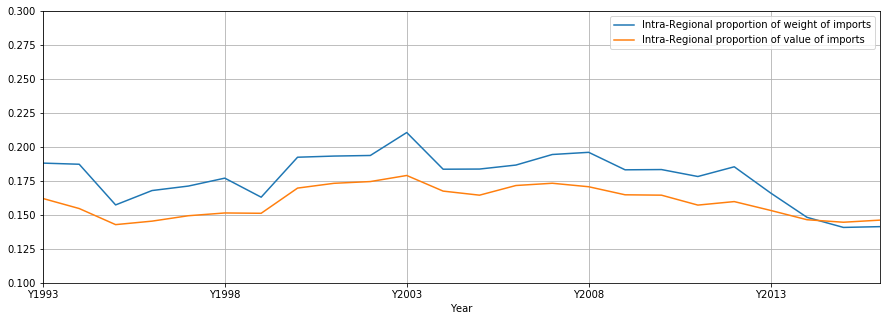

In [28]:
df_total_imports_w = df_intra_regional_imports_w_sums + df_inter_regional_imports_w_sums
df_total_imports_v = df_intra_regional_imports_v_sums + df_inter_regional_imports_v_sums

df_intra_regional_perc_w = df_intra_regional_imports_w_sums/df_total_imports_w
df_intra_regional_perc_v = df_intra_regional_imports_v_sums/df_total_imports_v

plt.figure(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('Proportion of Intra-Regional Trade')
df_intra_regional_perc_w.plot(label='Intra-Regional proportion of weight of imports')
df_intra_regional_perc_v.plot(label='Intra-Regional proportion of value of imports')
plt.ylim([0.1, 0.3])
plt.grid()
plt.legend()
plt.title('Proportion of Intra-Continental Trade')
plt.show()

We can see that there seems to be a slow decrease in the proportion of trade that is done between countries in the same region, that seems to have started around 2008.

TODO: We need to use statistics to determine if there is any significant change in values between 1993 and 2016.

### 4.5 Looking at Specific Items

We want to find which items show the most change in how they are traded (proportion of intra-regional trade over the years).

We only look at the 100 items that are the most traded in 2016, and only look at items where we have trade data for each year.

In [29]:
popular_items = df_trade.groupby('Item').sum().sort_values(by='Y2016', ascending=False)[:100]
popular_items.head()

,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
Item,,,,,,,,,,,,,,,,,,,,,
Wheat,176650824.0,180383391.0,185356460.0,197489712.0,195537155.0,214221527.0,208750621.0,238315940.0,230633877.0,255052780.0,...,294421291.0,314437644.0,318318691.0,300795976.0,351512608.0,374010175.0,384124230.0,432620669.0,405158516.0,438186987.0
Soybeans,65251423.0,69912845.0,74727342.0,77343990.0,91985494.0,88683124.0,90072654.0,113334339.0,134803177.0,133065839.0,...,191771836.0,232410482.0,225977919.0,268812164.0,275896790.0,296430971.0,321947896.0,354559011.0,364123987.0,374527769.0
Maize,129625950.0,132357955.0,160235437.0,146156354.0,139583471.0,158099339.0,154480827.0,176150643.0,178462191.0,190466393.0,...,246600861.0,240666998.0,226850136.0,242051811.0,270187717.0,287946691.0,302048704.0,342877971.0,339624391.0,354351798.0
"Oil, palm",21006610.0,26556879.0,28451206.0,27830433.0,18181322.0,30692427.0,33215808.0,33649990.0,38376056.0,46117731.0,...,84934161.0,113942697.0,108549954.0,115375671.0,141599701.0,146011727.0,143005161.0,151849808.0,151220395.0,137033534.0
Barley,27766871.0,30260739.0,28406070.0,29543654.0,27581967.0,31582385.0,33244364.0,48794662.0,41827085.0,46778991.0,...,55164818.0,56695896.0,56517055.0,58743985.0,58893281.0,66368814.0,72760708.0,75146455.0,86899813.0,77967308.0


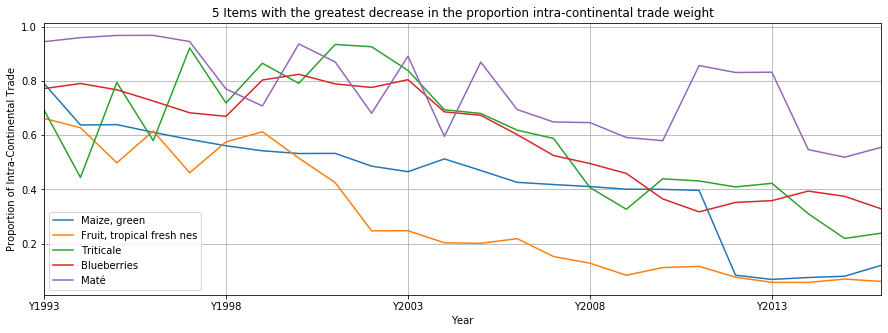

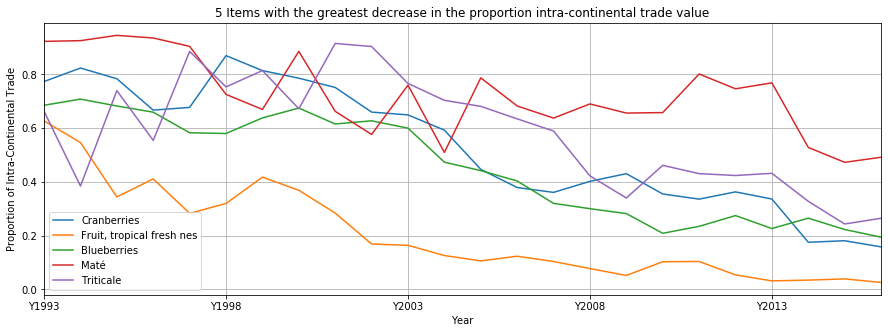

In [74]:
items_kept = list(popular_items.index)

def change_sort(item):
    row = item[1]
    if row.isnull().values.any():
        return 0
    else:
        return np.abs(row['Y1993'] - row['Y2016'])

df_item_intra_regional_w = df_intra_regional_imports_w[df_intra_regional_imports_w['Item'].isin(items_kept)]\
                            .groupby('Item')[[f'Y{label}' for label in range(1993, 2017)]].sum()
df_item_intra_regional_v = df_intra_regional_imports_v[df_intra_regional_imports_v['Item'].isin(items_kept)]\
                            .groupby('Item')[[f'Y{label}' for label in range(1993, 2017)]].sum()

df_item_inter_regional_w = df_inter_regional_imports_w[df_inter_regional_imports_w['Item'].isin(items_kept)]\
                            .groupby('Item')[[f'Y{label}' for label in range(1993, 2017)]].sum()
df_item_inter_regional_v = df_inter_regional_imports_v[df_inter_regional_imports_v['Item'].isin(items_kept)]\
                            .groupby('Item')[[f'Y{label}' for label in range(1993, 2017)]].sum()

df_item_imports_w = df_item_intra_regional_w + df_item_inter_regional_w
df_item_imports_v = df_item_intra_regional_v + df_item_inter_regional_v

df_item_intra_regional_perc_w = df_item_intra_regional_w/df_item_imports_w
df_item_intra_regional_perc_v = df_item_intra_regional_v/df_item_imports_v

item_intra_regional_perc_w = []
for index, row in df_item_intra_regional_perc_w.iterrows():
    item_intra_regional_perc_w.append((
        row.name,
        row
    ))

item_intra_regional_perc_v = []
for index, row in df_item_intra_regional_perc_v.iterrows():
    item_intra_regional_perc_v.append((
        row.name,
        row
    ))

item_intra_regional_perc_w.sort(key=change_sort, reverse=True)
item_intra_regional_perc_v.sort(key=change_sort, reverse=True)

plt.figure(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('Proportion of Intra-Continental Trade')
for name, row in item_intra_regional_perc_w[:5]:
    row.plot(label=name)
plt.grid()
plt.legend()
plt.title('5 Items with the greatest decrease in the proportion intra-continental trade weight')
plt.show()

plt.figure(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('Proportion of Intra-Continental Trade')
for name, row in item_intra_regional_perc_v[:5]:
    row.plot(label=name)
plt.grid()
plt.legend()
plt.title('5 Items with the greatest decrease in the proportion intra-continental trade value')
plt.show()

We can see some interesting items in the plot. For example, Maté's popularity in Western europe and North America has greatly increased in the past 20 years, which could explain the decrease in Intra-Continental Trade, as it's being shipped from where in grows in South America to Europe and North America.

## 5. Exploring similarities within countries

In this section we focus only on year 2016 and we study the similarities amongst the products produced, imported and exported between different countries, as well as the countries they trade with. As a measure of similarity we have used the Jaccard similarity and only 50 popular countries have been selected for easier visualization. The results are presented using heatmaps and grouping the countries based on the similarity (clustermap) for better comparisons. 
The next step of the project will be to include this results in a World-Map considering all countries and to extend them to different years.

In [6]:
# Countries selected
countries = ['Austria', 'Argentina', 'Belgium', 'Brazil', 'Bahamas', 'Canada','China, Hong Kong SAR', 'China, Taiwan Province of', 'China, mainland',  'Croatia','Cuba', 'Czechia',
       'Denmark', 'Dominica', 'Ecuador','Estonia','Finland','France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India','Ireland', 'Italy', 'Iran (Islamic Republic of)','Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Morocco', 'Netherlands', 'Norway', 'Poland','Portugal','Republic of Moldova','Pakistan', 'Romania', 'Russian Federation', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland','Turkey', 'Ukraine', 'United Arab Emirates','United Kingdom', 'United States of America']
df_countries = pd.DataFrame(countries)
df_countries.columns = ['Reporter Countries']

In [2]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

### 5.1. Similarity of products produced.

Each cell of the heatmap represents the similarity between each pair of countries considering the products they produce. We use the production matrix above saved. If we take a look i.e. at Switzerland, we find that it produces similar products as Austria, Germany, Poland and Canada. However, these clusters should be further analysis: Switzerland appears close to Russia, but the similarity is low. Belgium and France are also groupped separetdly but they have a high similarity with Switzerland. Spain, Turkey, Greeve and Italy also appear together.

We also plot the hierarchically-clustered heatmap. and now, we found Switzerland grouped with countries as

In [100]:
df_prod = pd.read_pickle("data/df_prod.pkl")
df_prod = df_prod.merge(df_countries, left_on = 'Area', right_on = 'Reporter Countries', how='inner')

(None, None)

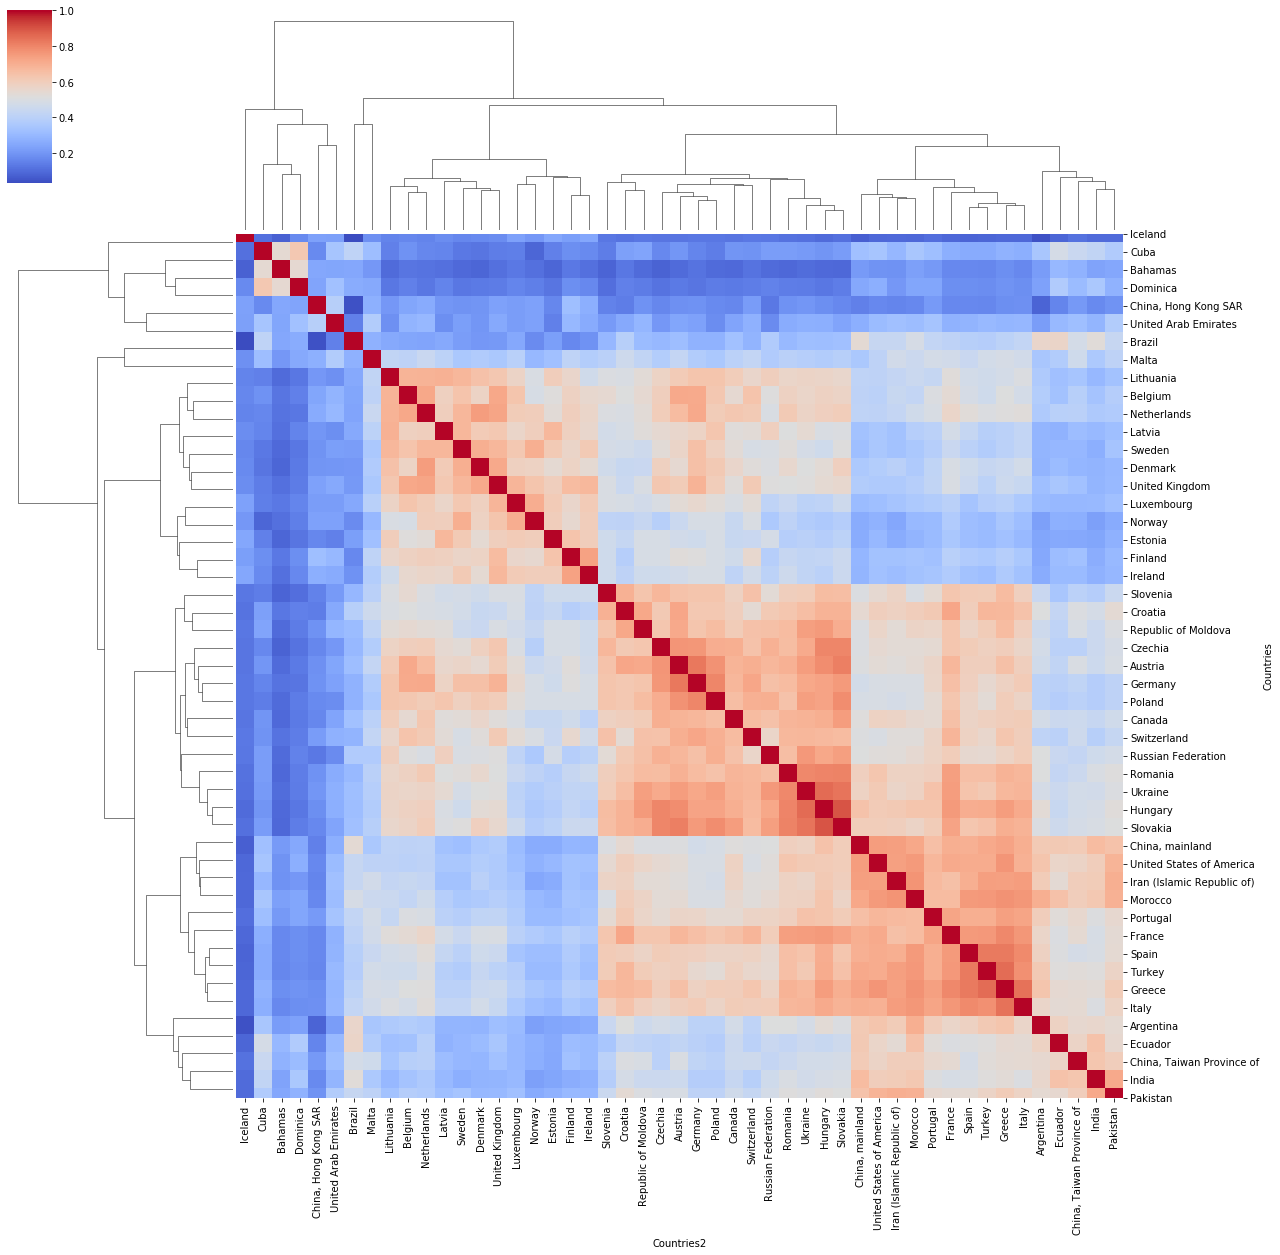

In [71]:
# Delete this items with 0 value of production
df_prod_simil = df_prod.loc[df_prod['Y2016'] != 0][['Area','Item','Y2016']].copy()
# We group by area, and list the items for each area
df_prod_simil = df_prod_simil.groupby('Area')['Item'].apply(list).reset_index(name='Collection Items')

# Compute Jaccard similarity
n = len(df_prod_simil)
labels = df_imp_simil['Reporter Countries']
df_sim = pd.DataFrame(columns = ['Countries', 'Countries2', 'Similarity'])
for i in range(n):
    for j in range(n):
        list1 = df_prod_simil['Collection Items'].iloc[i]
        list2 = df_prod_simil['Collection Items'].iloc[j]
        a = jaccard_similarity(list1, list2)
        df_sim = df_sim.append({'Countries': labels[i], 'Countries2': labels[j], 'Similarity': a}, ignore_index=True)

df_pivot = df_sim.pivot('Countries', 'Countries2', 'Similarity')

clust = sns.clustermap(df_pivot, cmap='coolwarm', xticklabels=True, yticklabels=True)
clust.fig.set_figwidth(20), clust.fig.set_figheight(20)

### 5.2. Similarity of products imported.

Each cell of the heatmap represents the similarity within countries considering the products they import. The same approach has been used to study the products they export, but for simplicity they are not included here.

In [14]:
df_imp = pd.read_pickle("data/df_imp.pkl")
df_imp = df_imp.merge(df_countries, on = 'Reporter Countries', how='inner')

(None, None)

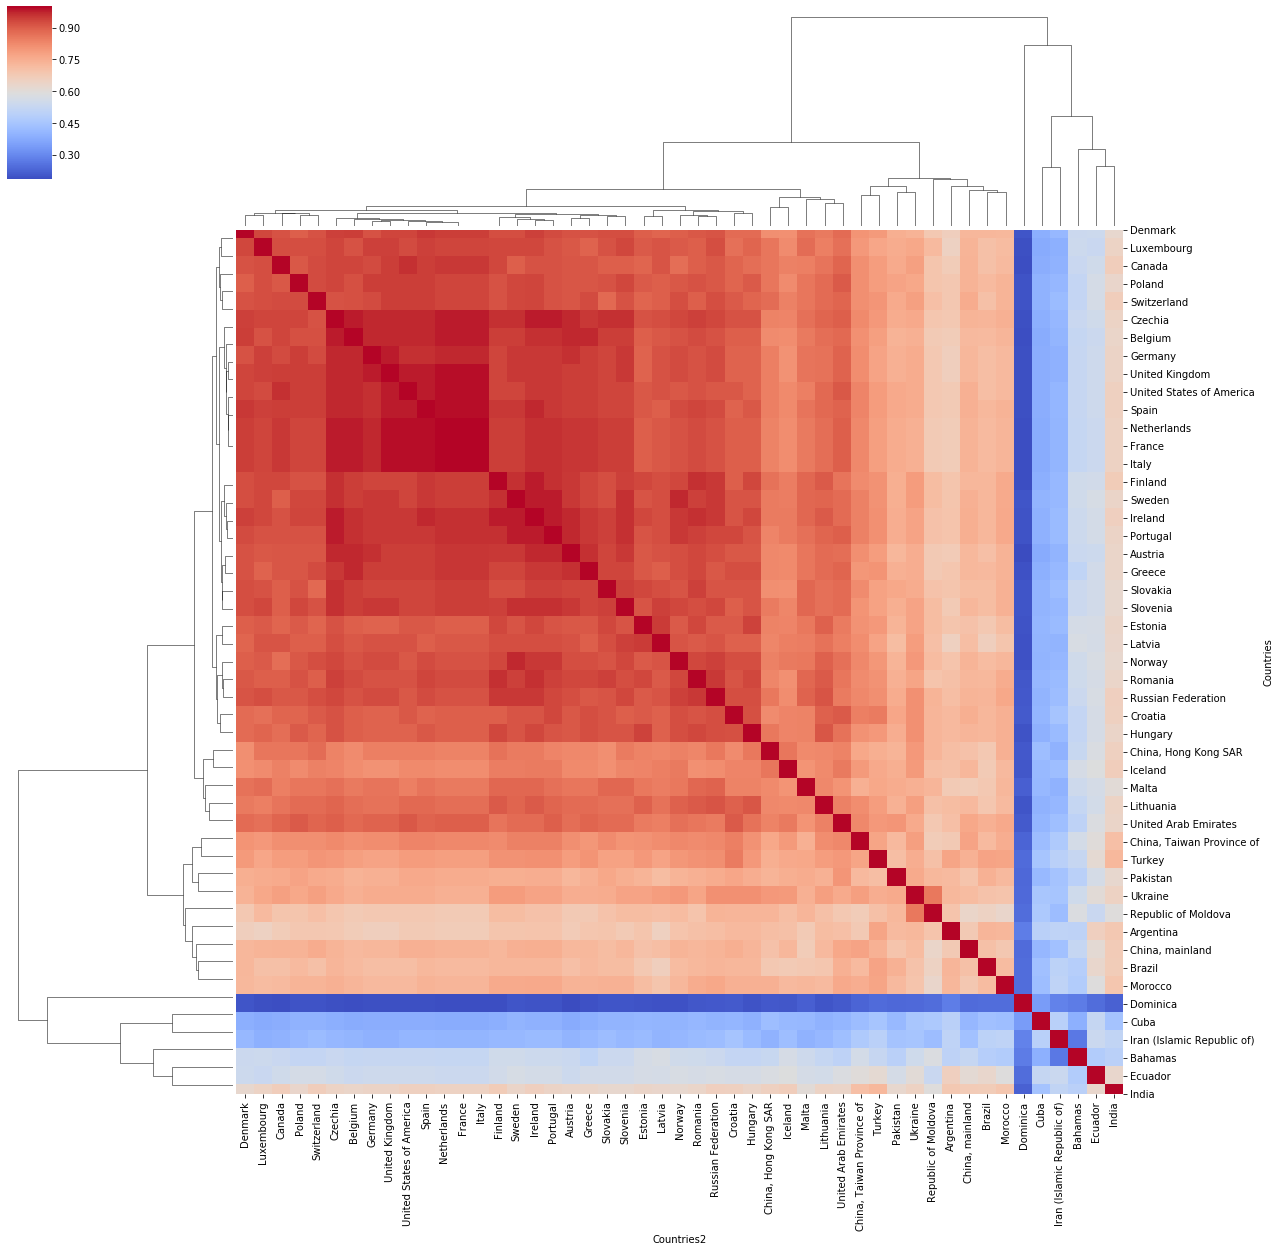

In [72]:
# Delete this items with 0 value of production
df_imp_simil_prod = df_imp.loc[df_imp['Y2016'] != 0][['Reporter Countries','Item','Y2016']].copy()
df_imp_simil_prod = df_imp_simil_prod.groupby('Reporter Countries')['Item'].apply(list).reset_index(name='Products Imported')

# Compute Jaccard similarity
n = len(df_imp_simil_prod)
labels = df_imp_simil['Reporter Countries']
df_sim = pd.DataFrame(columns = ['Countries', 'Countries2', 'Similarity'])

for i in range(n):
    for j in range(n):
        list1 = df_imp_simil_prod['Products Imported'].iloc[i]
        list2 = df_imp_simil_prod['Products Imported'].iloc[j]
        a = jaccard_similarity(list1, list2)
        df_sim = df_sim.append({'Countries': labels[i], 'Countries2': labels[j], 'Similarity': a}, ignore_index=True)

df_pivot = df_sim.pivot('Countries', 'Countries2', 'Similarity')

clust = sns.clustermap(df_pivot, cmap='coolwarm', xticklabels=True, yticklabels=True)
clust.fig.set_figwidth(20), clust.fig.set_figheight(20)

### 5.3. Similarity of countries they import from

In this case, we consider the countries each country import from. Each cell of the heatmap represents the similarity considering these countries. The same results can be extended to exports. 

(None, None)

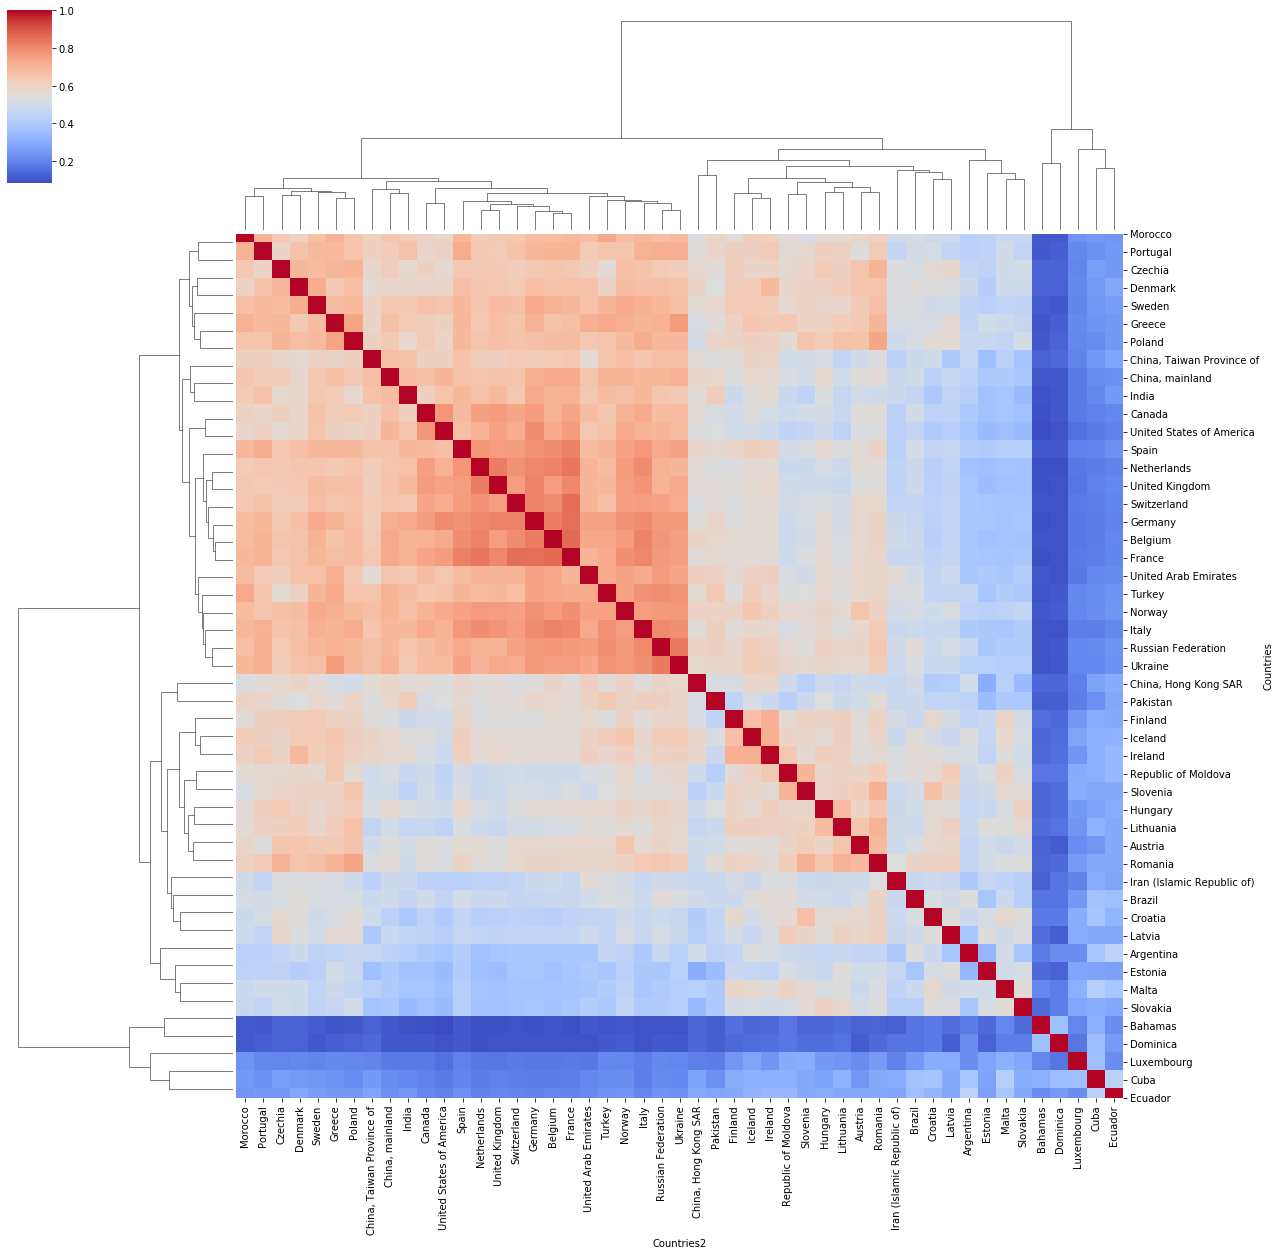

In [73]:
# Delete this items with 0 value of production
df_imp_simil = df_imp.loc[df_imp['Y2016'] != 0][['Reporter Countries','Partner Countries','Y2016']].copy()
df_imp_simil = df_imp_simil.groupby('Reporter Countries')['Partner Countries'].apply(list).reset_index(name='Partner Countries')

# Compute Jaccard similarity
n1 = len(df_imp_simil)
n2 = len(df_imp_simil)
labels = df_imp_simil['Reporter Countries']
df_sim = pd.DataFrame(columns = ['Countries', 'Countries2', 'Similarity'])

for i in range(n1):
    for j in range(n2):
        list1 = df_imp_simil['Partner Countries'].iloc[i]
        list2 = df_imp_simil['Partner Countries'].iloc[j]
        a = jaccard_similarity(list1, list2)
        df_sim = df_sim.append({'Countries': labels[i], 'Countries2': labels[j], 'Similarity': a}, ignore_index=True)

df_pivot = df_sim.pivot('Countries', 'Countries2', 'Similarity')
clust = sns.clustermap(df_pivot, cmap='coolwarm', xticklabels=True, yticklabels=True)
clust.fig.set_figwidth(20), clust.fig.set_figheight(20)

## 6. Exploring similarities within products

In this case we follow the same approach as before but grouping products considering the countries where they are produced. It could also be extended to where they are imported/exported. We select a subset of products. From the results it can be highlighted that tropical products as avocados, coconuts, pineapples, as well as coffe and tea are groupped together.

In [107]:
# Items selected
items = ['Almonds, with shell', 'Apples', 'Apricots', 'Grapes', 'Olives','Oranges', 'Peaches and nectarines', 'Pears',
       'Pistachios',  'Potatoes', 'Sesame seed','Sunflower seed', 'Vegetables, fresh nes','Watermelons', 'Wheat', 'Beans, green', 'Carrots and turnips','Cauliflowers and broccoli', 'Chillies and peppers, green',
       'Cucumbers and gherkins', 'Dates', 'Eggplants (aubergines)','Garlic', 'Lemons and limes', 'Lettuce and chicory','Mushrooms and truffles', 'Oats', 
       'Peas, green', 'Soybeans', 'Spinach','Tomatoes', 'Artichokes','Bananas', 'Chick peas', 'Chillies and peppers, dry','Lentils','Strawberries', 
       'Cocoa, beans', 'Coconuts', 'Pineapples','Cashew nuts, with shell', 'Coffee, green', 'Oil, palm','Sweet potatoes', 'Mangoes, mangosteens, guavas','Avocados', 'Papayas', 'Tea', 'Hazelnuts, with shell',
       'Blueberries','Kiwi fruit', 'Mustard seed','Plantains and others', 'Areca nuts',
       'Ginger', 'Jute', 'Pepper (piper spp.)','Quinoa','Cashewapple', 'Bambara beans', 'Cloves', 'Vanilla']

(None, None)

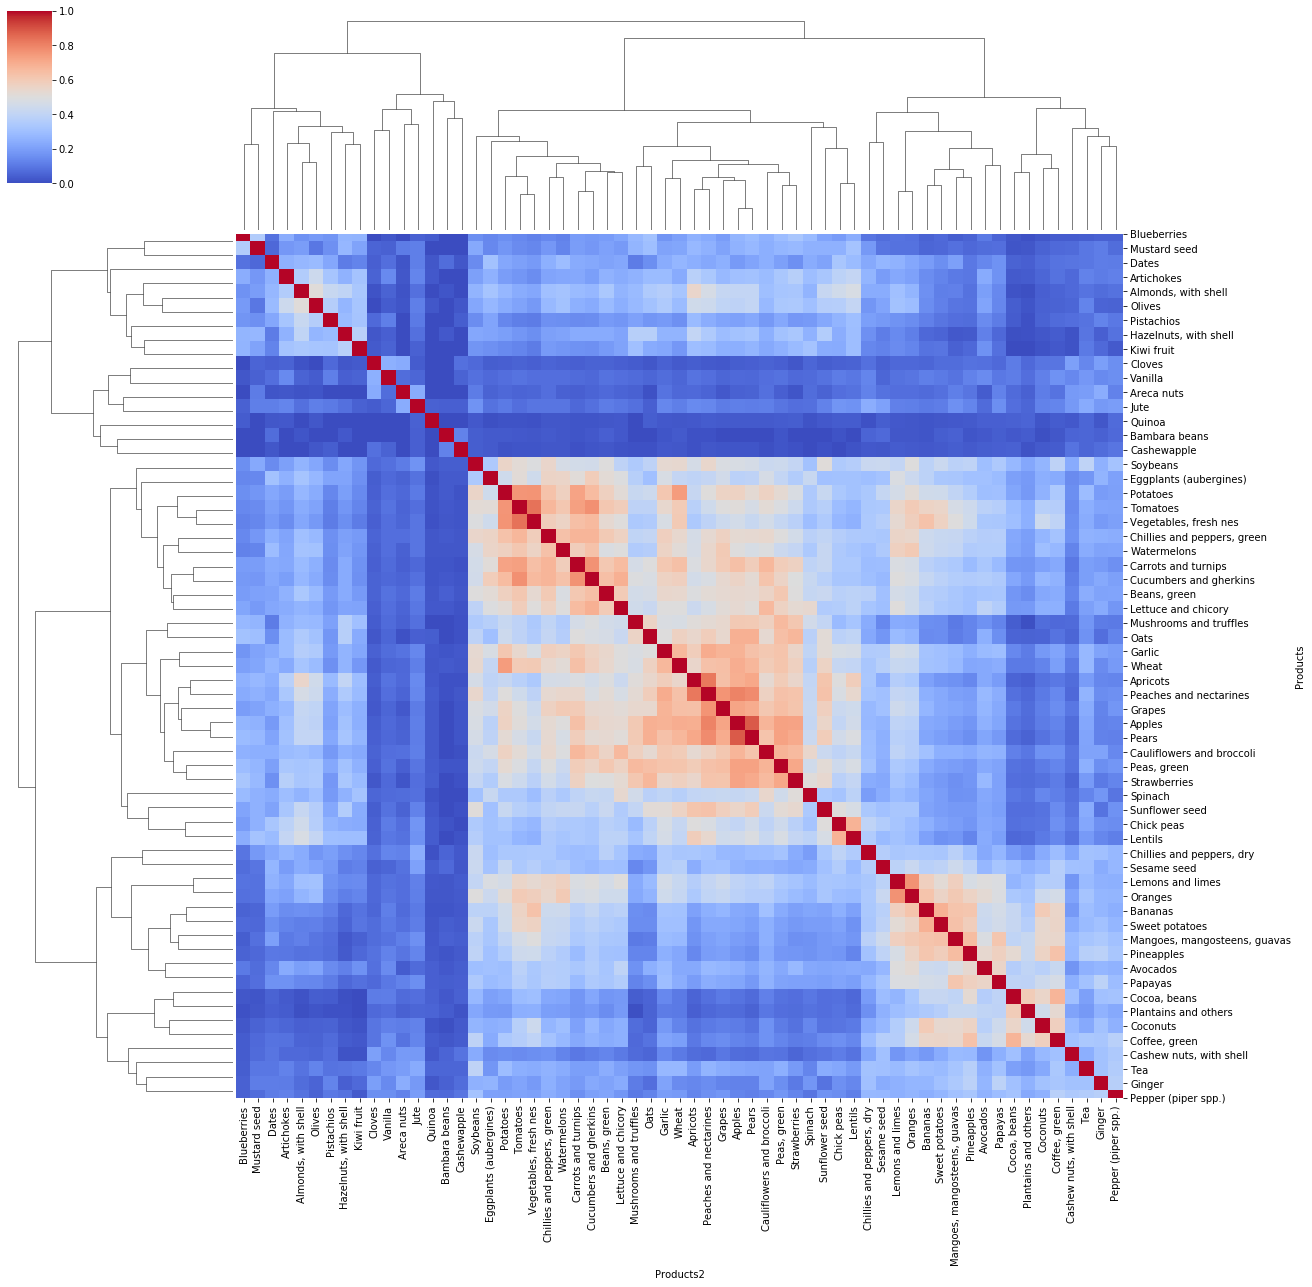

In [112]:
df_items = pd.DataFrame(items)
df_items.columns = ['Item']
df_prod = pd.read_pickle("data/df_prod.pkl")
df_prod = df_prod.merge(df_items, on = 'Item', how='inner')

# Delete this items with 0 value of production
df_area_simil = df_prod.loc[df_prod['Y2016'] != 0][['Area','Item','Y2016']].copy()
df_area_simil = df_area_simil.groupby('Item')['Area'].apply(list).reset_index(name='Areas production')

# Compute Jaccard similarity
n = len(df_area_simil)
labels = df_area_simil['Item']
df_sim = pd.DataFrame(columns = ['Products', 'Products2', 'Similarity'])

for i in range(n):
    for j in range(n):
        list1 = df_area_simil['Areas production'].iloc[i]
        list2 = df_area_simil['Areas production'].iloc[j]
        a = jaccard_similarity(list1, list2)
        df_sim = df_sim.append({'Products': labels[i], 'Products2': labels[j], 'Similarity': a}, ignore_index=True)

df_pivot = df_sim.pivot('Products', 'Products2', 'Similarity')
clust = sns.clustermap(df_pivot, cmap='coolwarm', xticklabels=True, yticklabels=True)
clust.fig.set_figwidth(20), clust.fig.set_figheight(20)